<img src=https://ia.media-imdb.com/images/M/MV5BMTk3ODA4Mjc0NF5BMl5BcG5nXkFtZTgwNDc1MzQ2OTE@._V1_.png width="600">


<h1 align="center">MSIN0097 Predictive Analytics</h1>
<h1 align="center">Individual Coursework</h1>
<h1 align="center">Predicting Worldwide Gross Income of Movies using IMDb Data</h1>
<h3 align="center">Word Count: 1995</h3>
<h3 align="center">7 March 2021</h3>



<h3>Table of Contents</h3>

* [1 Introduction](#1-Introduction)
    * [1.1 Context and Objective](#1.1-Context-and-Objective)
* [2 Dataset](#2-Dataset)
* [3 Data Cleaning](#3-Data-Cleaning)
* [4 Data Wrangling](#4-Data-Wrangling)
    * [4.1 Genre](#4.1-Genre)
    * [4.2 Language](#4.2-Language)
    * [4.3 Country](#4.3-Country)
    * [4.4 Converting Currency Into Integer](#4.4-Converting-Currency-Into-Integer)
* [5 Data Exploration](#5-Data-Exploration)
    * [5.1 Language](#5.1-Language)
    * [5.2 Genre](#5.2-Genre)
    * [5.3 Country](#5.3-Country)
    * [5.4 Votes Variables](#5.4-Votes-Variables)
    * [5.5 Distributions & Correlations](#5.5-Distributions-&-Correlations)
* [6 Scaling and Feature Selection](#6-Scaling-and-Feature-Selection)
    * [6.1 Initial Linear Regression (Base Model)](#6.1-Initial-Linear-Regression-(Base-Model)-)
        * [6.1.1 Splitting the Data](#6.1.1-Splitting-the-Data)
        * [6.1.2 Running the Model](#6.1.2-Running-the-Model)
    * [6.2 MinMaxScaler & StandardScaler](#6.2-MinMaxScaler-&-StandardScaler)
    * [6.3 Log of Target Variable](#6.3-Log-of-Target-Variable])
    * [6.4 Feature Selection](#6.4-Feature-Selection)
        * [6.4.1 Important Coefficient Variables](#6.4.1-Important-Coefficient-Variables)
        * [6.4.2 Correlated Variables (10)](#6.4.2-Correlated-Variables-(10)-)
        * [6.4.3 Correlated Variables (20)](#6.4.3-Correlated-Variables-(20)-) 
        * [6.4.4 Correlated Variables (30)](#6.4.4-Correlated-Variables-(30)-)
    * [6.5 Principle Component Analysis](#6.5-Principle-Component-Analysis)
* [7 Experimenting with Various Model](#7-Experimenting-with-Various-Model)
    * [7.1 Ridge Regression](#7.1-Ridge-Regression)
    * [7.2 Lasso Regression](#7.2-Lasso-Regression)
    * [7.3 ElasticNet Regression](#7.3-ElasticNet-Regression)
    * [7.4 Stochastic Gradient Descent Regressor](#7.4-Stochastic-Gradient-Descent-Regressor)
    * [7.5 Support Vector Regression](#7.5-Support-Vector-Regression)
    * [7.6 Decision Tree](#7.6-Decision-Tree)
    * [7.7 RandomForest](#7.7-RandomForest)
    * [7.8 XGBoost Regressor](#7.8-XGBoost-Regressor)
    * [7.9 Multi-layer Perceptron Regressor (Neural Network)](#7.9-Multi-layer-Perceptron-Regressor-(Neural-Network))
* [8 Finetuning](#8-Finetuning)
    * [8.1 Decision Tree](#8.1-Decision-Tree)
        * [8.1.1 Grid Search](#8.1.1-Grid-Search)
        * [8.1.2 Random Search](#8.1.2-Random-Search)
    * [8.2 XGBoost Regressor](#8.2-XGBoost-Regressor)
    * [8.3 RandomForest](#8.3-RandomForest)
        * [8.3.1 Grid Search](#8.3.1-Grid-Search)
        * [8.3.2 Random Search](#8.3.2-Random-Search)
* [9 Conclusion](#9-Conclusion)
    * [9.1 Limitations](#9.1-Limitations)
* [10 References](#10-References)


# 1 Introduction

## 1.1 Context and Objective

As movies are in the visual arts, they are unpredictable when it comes to their success. The determinants of a movies's gross income are complex, with no evident recipe for prosperity. However, in the last two decades websites such as IMDB and Rotten Tomatoes are providing users with a platform to rate and review movies. This gives an idea of the quality and popularity of a movie, which may help predict its future income. 

This project aims to predict the world gross income of movies using extensive data from IMDb. Being able to accurately predict the world gross income, will help movie producers and investors make better decisions on movie production and marketing budgets, improving returns on investment. 

Film producers could use preview screenings of unfinished movies and let a select few amount of viewers review the movie. This would provide data to make predictions on the expected worldwide gross income that movie would generate.


In [541]:
#common imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore")

# 2 Dataset

The data was acquired from a dataset found on Kaggle which scraped IMDb data from the IMDb's publicly avaialable website.

The data contains movies from IMDb that have more than 100 ratings and have been scraped as of 01/01/2020.


In [543]:
#importing the datasets

#Dataset = https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.cs

#two seperate datasets: one containing  movie information and the other containing IMDB user votes and rating information
import faculty.datasets as datasets
df = datasets.get('/IMDbmovies.csv', 'IMDbmovies.csv')
df = datasets.get('/IMDb ratings.csv', 'IMDb ratings.csv')
movies = pd.read_csv("IMDbmovies.csv")
ratings = pd.read_csv("IMDb ratings.csv")


In [544]:
#checking size of both datasets and ensure they have the same amount of instances (rows)
movies.shape
ratings.shape

(85855, 22)

(85855, 49)

In [545]:
#quick look at movies dataset
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [546]:
#quick look at ratings dataset
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


# 3 Data Cleaning

In [547]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [548]:
#merging dataset of ratings and movies together 
data = pd.merge(ratings, movies, on='imdb_title_id')

In [549]:
#checking if succesfully joined
data.shape
data.info()

(85855, 70)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [550]:
#further info of the merged dataset
data.describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,...,85646.000000,85646.000000,85854.000000,85854.000000,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,...,5.925910,1647.822537,5.749638,4332.940865,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,...,1.308087,8455.978158,1.285570,23243.807279,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,...,5.200000,24.000000,5.000000,95.000000,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,...,6.100000,81.000000,6.000000,225.000000,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,290.000000,178.000000,...,6.800000,335.000000,6.700000,841.000000,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,9.900000,2.278845e+06,9.800000,10.000000,1.259076e+06,629582.000000,418070.000000,241832.000000,145740.000000,78385.000000,...,10.000000,348363.000000,10.000000,887226.000000,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [551]:
#dropping columns that are insignificant to the analysis as they are not categorical or numerical (close to unique values)
data.drop(['imdb_title_id','title','original_title','director','writer','production_company','actors','description','date_published'], axis=1, inplace=True)

In [552]:
#renaming column to correct spelling
data.rename(columns={'worlwide_gross_income': 'worldwide_gross_income'}, inplace = True)


In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weighted_average_vote      85855 non-null  float64
 1   total_votes                85855 non-null  int64  
 2   mean_vote                  85855 non-null  float64
 3   median_vote                85855 non-null  float64
 4   votes_10                   85855 non-null  int64  
 5   votes_9                    85855 non-null  int64  
 6   votes_8                    85855 non-null  int64  
 7   votes_7                    85855 non-null  int64  
 8   votes_6                    85855 non-null  int64  
 9   votes_5                    85855 non-null  int64  
 10  votes_4                    85855 non-null  int64  
 11  votes_3                    85855 non-null  int64  
 12  votes_2                    85855 non-null  int64  
 13  votes_1                    85855 non-null  int

In [554]:
#dealing with duplicates
sum(data.duplicated(subset=None, keep='first'))


0

In [555]:
#filtering on the variables where number of Null values is greater than zero
null_counts = data.isnull().sum()
null_counts[null_counts > 0]

allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes             1465
males_30age_avg_vote            12
males_30age_votes               12
males_45age_avg_vote           101
males_45age_votes              101
females_allages_avg_vote        81
females_allages_votes           81
females_0age_avg_vote        63738
females_0age_votes           63738
females_18age_avg_vote        6521
females_18age_votes           6521
females_30age_avg_vote         944
females_30age_votes            944
females_45age_avg_vote        2798
females_45age_votes           2798
top1000_voters_ratin

As the dataset has 85,000 rows we can remove any rows with null values instead of taking the median to fill the missng value .

In [556]:
#dropping columns that have too many Null Values 
#columns with over 50,000 missing values (exception of world_gross_income as this is what we will predict)
data.drop(['allgenders_0age_avg_vote','allgenders_0age_votes','males_0age_avg_vote','males_0age_votes','females_0age_avg_vote','females_0age_votes','usa_gross_income','metascore'], axis=1, inplace=True)

In [557]:
#filtering on the columns where number of Null values is greater than zero
null_counts = data.isnull().sum()
null_counts[null_counts > 0]

allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_18age_avg_vote          1465
males_18age_votes             1465
males_30age_avg_vote            12
males_30age_votes               12
males_45age_avg_vote           101
males_45age_votes              101
females_allages_avg_vote        81
females_allages_votes           81
females_18age_avg_vote        6521
females_18age_votes           6521
females_30age_avg_vote         944
females_30age_votes            944
females_45age_avg_vote        2798
females_45age_votes           2798
top1000_voters_rating          679
top1000_voters_votes           679
us_voters_rating               209
us_voters_votes                209
non_us_voters_rating             1
non_us_voters_votes              1
country             

In [558]:
#droppping rows with NaN in columns
data = data[pd.notnull(data['allgenders_18age_avg_vote'])]
data = data[pd.notnull(data['allgenders_18age_votes'])]
data = data[pd.notnull(data['allgenders_30age_avg_vote'])]
data = data[pd.notnull(data['allgenders_30age_votes'])]
data = data[pd.notnull(data['allgenders_45age_avg_vote'])]
data = data[pd.notnull(data['allgenders_45age_votes'])]
data = data[pd.notnull(data['males_allages_avg_vote'])]
data = data[pd.notnull(data['males_allages_votes'])]
data = data[pd.notnull(data['males_18age_avg_vote'])]
data = data[pd.notnull(data['males_18age_votes'])]
data = data[pd.notnull(data['males_30age_avg_vote'])]
data = data[pd.notnull(data['males_30age_votes'])]
data = data[pd.notnull(data['males_45age_avg_vote'])]
data = data[pd.notnull(data['males_45age_votes'])]
data = data[pd.notnull(data['females_allages_avg_vote'])]
data = data[pd.notnull(data['females_allages_votes'])]
data = data[pd.notnull(data['females_18age_avg_vote'])]

data = data[pd.notnull(data['females_18age_votes'])]
data = data[pd.notnull(data['females_30age_avg_vote'])]
data = data[pd.notnull(data['females_30age_votes'])]
data = data[pd.notnull(data['females_45age_avg_vote'])]
data = data[pd.notnull(data['females_45age_votes'])]
data = data[pd.notnull(data['top1000_voters_rating'])]
data = data[pd.notnull(data['top1000_voters_votes'])]
data = data[pd.notnull(data['us_voters_rating'])]
data = data[pd.notnull(data['us_voters_votes'])]
data = data[pd.notnull(data['non_us_voters_rating'])]


data = data[pd.notnull(data['non_us_voters_votes'])]
data = data[pd.notnull(data['budget'])]
data = data[pd.notnull(data['country'])]
data = data[pd.notnull(data['language'])]
data = data[pd.notnull(data['worldwide_gross_income'])]
data = data[pd.notnull(data['reviews_from_users'])] 
data = data[pd.notnull(data['reviews_from_critics'])]


In [559]:
#checking to make sure there are no null values in the dataset
null_counts = data.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [560]:
#checking updated dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11723 entries, 165 to 85843
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weighted_average_vote      11723 non-null  float64
 1   total_votes                11723 non-null  int64  
 2   mean_vote                  11723 non-null  float64
 3   median_vote                11723 non-null  float64
 4   votes_10                   11723 non-null  int64  
 5   votes_9                    11723 non-null  int64  
 6   votes_8                    11723 non-null  int64  
 7   votes_7                    11723 non-null  int64  
 8   votes_6                    11723 non-null  int64  
 9   votes_5                    11723 non-null  int64  
 10  votes_4                    11723 non-null  int64  
 11  votes_3                    11723 non-null  int64  
 12  votes_2                    11723 non-null  int64  
 13  votes_1                    11723 non-null  i

# 4 Data Wrangling

The data wrangling will not be completed using OnehotEncoder as each movie can have more than one genre, language and country. For example, a movie can be in the genre of Horror, Action and Comedy. 

## 4.1 Genre

In [561]:
#removing uneccessary spaces from genre column as it would disrupt the splitting of the genres as done subsequently
data.genre = data.genre.str.replace(' ', '')
data.head()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,genre,duration,country,language,avg_vote,votes,budget,worldwide_gross_income,reviews_from_users,reviews_from_critics
165,8.1,55601,7.9,8.0,11426,11262,15971,8883,3517,1562,...,"Fantasy,Horror,Mystery",76,Germany,German,8.1,55601,$ 18000,$ 8811,237.0,160.0
245,7.2,3058,7.8,8.0,943,283,627,550,321,135,...,"Drama,Romance,War",150,USA,None,7.2,3058,$ 800000,$ 9183673,45.0,16.0
251,8.3,109038,8.2,8.0,23534,25845,32851,15241,5167,2461,...,"Comedy,Drama,Family",68,USA,"English, None",8.3,109038,$ 250000,$ 26916,173.0,105.0
348,7.0,4735,7.1,7.0,397,409,966,1513,813,360,...,"Drama,Romance",82,USA,"None, English",7.0,4735,$ 351000,$ 11233,37.0,24.0
415,8.2,97480,8.1,8.0,19999,21164,29963,15268,5187,2237,...,"Adventure,Comedy,Drama",95,USA,"English, None",8.2,97480,$ 923000,$ 26916,190.0,125.0


In [562]:
#splitting the genres and finding unique values of genres
genre_iter = (set(x.split(',')) for x in data.genre)
genres = sorted(set.union(*genre_iter))
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [563]:
#creating a dummy dataframe filled with zeroes, with the same number of rows as the original dataset
#and the same number of columns as the number of differente movie genres
dummies = DataFrame(np.zeros((len(data), len(genres))), columns=genres)
dummies.head(10)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [564]:
#iterate through each row in the dummy dataframe and give the value of '1' if the genre is located in the respective 
#genre cell of the origianl dataset (IMDb)
for i, gen in enumerate(data.genre): dummies.loc[i, gen.split(',')] = 1


In [565]:
#Reset the index values in the dataset to concatenate the dummy dataset and original dataset
data.reset_index(inplace=True)
data.head()

,index,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,genre,duration,country,language,avg_vote,votes,budget,worldwide_gross_income,reviews_from_users,reviews_from_critics
0,165,8.1,55601,7.9,8.0,11426,11262,15971,8883,3517,...,"Fantasy,Horror,Mystery",76,Germany,German,8.1,55601,$ 18000,$ 8811,237.0,160.0
1,245,7.2,3058,7.8,8.0,943,283,627,550,321,...,"Drama,Romance,War",150,USA,None,7.2,3058,$ 800000,$ 9183673,45.0,16.0
2,251,8.3,109038,8.2,8.0,23534,25845,32851,15241,5167,...,"Comedy,Drama,Family",68,USA,"English, None",8.3,109038,$ 250000,$ 26916,173.0,105.0
3,348,7.0,4735,7.1,7.0,397,409,966,1513,813,...,"Drama,Romance",82,USA,"None, English",7.0,4735,$ 351000,$ 11233,37.0,24.0
4,415,8.2,97480,8.1,8.0,19999,21164,29963,15268,5187,...,"Adventure,Comedy,Drama",95,USA,"English, None",8.2,97480,$ 923000,$ 26916,190.0,125.0


In [566]:
#dropping the index column that was 'created' after resetting the index
data.drop("index", axis=1, inplace=True)
data.head()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,genre,duration,country,language,avg_vote,votes,budget,worldwide_gross_income,reviews_from_users,reviews_from_critics
0,8.1,55601,7.9,8.0,11426,11262,15971,8883,3517,1562,...,"Fantasy,Horror,Mystery",76,Germany,German,8.1,55601,$ 18000,$ 8811,237.0,160.0
1,7.2,3058,7.8,8.0,943,283,627,550,321,135,...,"Drama,Romance,War",150,USA,None,7.2,3058,$ 800000,$ 9183673,45.0,16.0
2,8.3,109038,8.2,8.0,23534,25845,32851,15241,5167,2461,...,"Comedy,Drama,Family",68,USA,"English, None",8.3,109038,$ 250000,$ 26916,173.0,105.0
3,7.0,4735,7.1,7.0,397,409,966,1513,813,360,...,"Drama,Romance",82,USA,"None, English",7.0,4735,$ 351000,$ 11233,37.0,24.0
4,8.2,97480,8.1,8.0,19999,21164,29963,15268,5187,2237,...,"Adventure,Comedy,Drama",95,USA,"English, None",8.2,97480,$ 923000,$ 26916,190.0,125.0


In [567]:
#concatenating the dummy dataframe and our original dataset (data)
#adding prefix to genre column names for clarity when exploring the data later
data = pd.concat([data, dummies.add_prefix('Genre_')], axis = 1)
data.head()


,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western
0,8.1,55601,7.9,8.0,11426,11262,15971,8883,3517,1562,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.2,3058,7.8,8.0,943,283,627,550,321,135,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,8.3,109038,8.2,8.0,23534,25845,32851,15241,5167,2461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,4735,7.1,7.0,397,409,966,1513,813,360,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8.2,97480,8.1,8.0,19999,21164,29963,15268,5187,2237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [568]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11723 entries, 0 to 11722
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weighted_average_vote      11723 non-null  float64
 1   total_votes                11723 non-null  int64  
 2   mean_vote                  11723 non-null  float64
 3   median_vote                11723 non-null  float64
 4   votes_10                   11723 non-null  int64  
 5   votes_9                    11723 non-null  int64  
 6   votes_8                    11723 non-null  int64  
 7   votes_7                    11723 non-null  int64  
 8   votes_6                    11723 non-null  int64  
 9   votes_5                    11723 non-null  int64  
 10  votes_4                    11723 non-null  int64  
 11  votes_3                    11723 non-null  int64  
 12  votes_2                    11723 non-null  int64  
 13  votes_1                    11723 non-null  int

## 4.2 Language

In [569]:
#removing the None category as this is similar to a Null
data.language = data.language.str.replace('None','')

#removing uneccessary spaces from language column as it would disrupt the splitting of the genres as done subsequently
data.language = data.language.str.replace(' ', '')




In [570]:
#next few steps are the same as the genre dummy
lan_iter = (set(x.split(',')) for x in data.language)
languages = sorted(set.union(*lan_iter))


In [571]:
dummies_lan = DataFrame(np.zeros((len(data), len(languages))), columns=languages)
dummies_lan.head(10)

,,Abkhazian,Aboriginal,Acholi,Afrikaans,Akan,Albanian,Algonquin,AmericanSignLanguage,Amharic,...,Uzbek,Vietnamese,Visayan,Washoe,Welsh,Xhosa,Yakut,Yiddish,Yoruba,Zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [572]:
for i, gen in enumerate(data.language): dummies_lan.loc[i, gen.split(',')] = 1
dummies_lan.head(10)


,,Abkhazian,Aboriginal,Acholi,Afrikaans,Akan,Albanian,Algonquin,AmericanSignLanguage,Amharic,...,Uzbek,Vietnamese,Visayan,Washoe,Welsh,Xhosa,Yakut,Yiddish,Yoruba,Zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [573]:
data = pd.concat([data, dummies_lan.add_prefix('Lang_')], axis = 1)
data.head()

#deleting empty column
del data["Lang_"]

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,Lang_Uzbek,Lang_Vietnamese,Lang_Visayan,Lang_Washoe,Lang_Welsh,Lang_Xhosa,Lang_Yakut,Lang_Yiddish,Lang_Yoruba,Lang_Zulu
0,8.1,55601,7.9,8.0,11426,11262,15971,8883,3517,1562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.2,3058,7.8,8.0,943,283,627,550,321,135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.3,109038,8.2,8.0,23534,25845,32851,15241,5167,2461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,4735,7.1,7.0,397,409,966,1513,813,360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.2,97480,8.1,8.0,19999,21164,29963,15268,5187,2237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [574]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11723 entries, 0 to 11722
Data columns (total 270 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   weighted_average_vote                float64
 1   total_votes                          int64  
 2   mean_vote                            float64
 3   median_vote                          float64
 4   votes_10                             int64  
 5   votes_9                              int64  
 6   votes_8                              int64  
 7   votes_7                              int64  
 8   votes_6                              int64  
 9   votes_5                              int64  
 10  votes_4                              int64  
 11  votes_3                              int64  
 12  votes_2                              int64  
 13  votes_1                              int64  
 14  allgenders_18age_avg_vote            float64
 15  allgenders_18age_votes             

## 4.3 Country

In [575]:
#similar data wrangling process to Language and Gender variables
data.country = data.country.str.replace(' ', '')

In [576]:
country_iter = (set(x.split(',')) for x in data.country)
country = sorted(set.union(*country_iter))

In [577]:
dummies_country = DataFrame(np.zeros((len(data), len(country))), columns=country)
dummies_country.head(10)

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,UK,USA,Ukraine,UnitedArabEmirates,Uruguay,Venezuela,Vietnam,WestGermany,Yemen,Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [578]:
for i, gen in enumerate(data.country): dummies_country.loc[i, gen.split(',')] = 1
dummies_country.head(10)


,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,UK,USA,Ukraine,UnitedArabEmirates,Uruguay,Venezuela,Vietnam,WestGermany,Yemen,Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [579]:
data = pd.concat([data, dummies_country.add_prefix('Country_')], axis = 1)
data.head()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,Country_UK,Country_USA,Country_Ukraine,Country_UnitedArabEmirates,Country_Uruguay,Country_Venezuela,Country_Vietnam,Country_WestGermany,Country_Yemen,Country_Yugoslavia
0,8.1,55601,7.9,8.0,11426,11262,15971,8883,3517,1562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.2,3058,7.8,8.0,943,283,627,550,321,135,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.3,109038,8.2,8.0,23534,25845,32851,15241,5167,2461,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,4735,7.1,7.0,397,409,966,1513,813,360,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.2,97480,8.1,8.0,19999,21164,29963,15268,5187,2237,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4.4 Converting Currency Into Integer

In [580]:
#converting currency to a float and making sure all income and budget are in $. 
def get_currency(x):
    if len(str(x).split())>1:
        return str(x).split()[0]
    else:
        return "$"

def get_income(x):
    if len(str(x).split())>1:
        return float(str(x).split()[1])
    else:
        return float(x)

#applying the functions and replacing the column with the float value
data["budget currency"] = data["budget"].apply(get_currency)
data["budget"] = data["budget"].apply(get_income)
data["worldwide_gross_income currency"] = data["worldwide_gross_income"].apply(get_currency)
data["worldwide_gross_income"] = data["worldwide_gross_income"].apply(get_income)

#checking unique value is $ so no other currencies are in the dataset
data['worldwide_gross_income currency'].unique()
data['budget currency'].unique()

#removing currency column as they are no longer needed (was just to check no other currencies)
del data['worldwide_gross_income currency']
del data['budget currency']



array(['$'], dtype=object)

array(['$', 'GBP', 'DEM', 'FRF', 'SEK', 'ITL', 'JPY', 'RUR', 'AUD', 'HKD',
       'CAD', 'ESP', 'IEP', 'NOK', 'DKK', 'BEF', 'INR', 'EUR', 'ISK',
       'FIM', 'BRL', 'CZK', 'NLG', 'ATS', 'CNY', 'BND', 'THB', 'ZAR',
       'SGD', 'KRW', 'PLN', 'EGP', 'HUF', 'MXN', 'NZD', 'CHF', 'EEK',
       'TWD', 'LVL', 'TRL', 'ARS', 'MYR', 'IDR', 'BGL', 'VEB', 'LTL',
       'CLP', 'PKR', 'UAH', 'NGN', 'PHP', 'COP', 'HRK', 'RON', 'IRR',
       'ILS', 'AMD', 'DOP'], dtype=object)

In [581]:
#checking if budget is correlated with worldwide_gross_income
from scipy.stats import pearsonr

d1 = data['worldwide_gross_income']
d2 = data['budget']

# calculate Pearson's correlation
corr, _ = pearsonr(d1, d2)
print('Pearsons correlation: %.3f' % corr)

#there is no correlation between worldwide_gross_income and budget because budget has different currencies
#the budget variable will therefore be removed
del data ['budget']


Pearsons correlation: 0.008


In [582]:
#converting year from object to int to be able to train ML models later
data['year'] = data.year.astype(int)

In [583]:
#checking if wrangling is succesful
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11723 entries, 0 to 11722
Data columns (total 409 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   weighted_average_vote                float64
 1   total_votes                          int64  
 2   mean_vote                            float64
 3   median_vote                          float64
 4   votes_10                             int64  
 5   votes_9                              int64  
 6   votes_8                              int64  
 7   votes_7                              int64  
 8   votes_6                              int64  
 9   votes_5                              int64  
 10  votes_4                              int64  
 11  votes_3                              int64  
 12  votes_2                              int64  
 13  votes_1                              int64  
 14  allgenders_18age_avg_vote            float64
 15  allgenders_18age_votes             

# 5 Data Exploration

In [584]:
#checking the average world gross income of a film in the dataset
data['worldwide_gross_income'].mean()

52374075.178196706

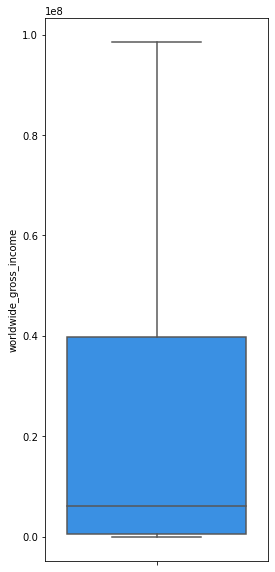

In [585]:
#looking at the worldwide_gross_income in a boxplot
plt.figure(figsize=(4,10))
s.boxplot(y='worldwide_gross_income', data=data,palette=['dodgerblue'], showfliers=False);

In [586]:
data['worldwide_gross_income'].describe()

count    1.172300e+04
mean     5.237408e+07
std      1.378180e+08
min      1.600000e+01
25%      4.800300e+05
50%      6.136856e+06
75%      3.967316e+07
max      2.797801e+09
Name: worldwide_gross_income, dtype: float64

We can observe that the dataset has a very high maximum value that is far away from the median. Futhermore, there is a a lot of variation in income between the median (\\$59,000,000) and the 75th percentile (\\$390,000,000). 

## 5.1 Language

In [743]:
#showing the top 7 most used languages in my cleaned dataset

votes = data.filter(like='Lang_').sum(axis=0)/len(data) #find the sum of rows of each column that contain 'Lang_' (films in a specific language) and divide by the total amount of rows (total amount of films)
votes = votes.sort_values(axis = 0, ascending = False) #sort values
votes.head(10)
votes = votes[:7] #selecting only top 7 to makes the pie plot look good

Lang_English     0.770467
Lang_French      0.123253
Lang_Spanish     0.107097
Lang_German      0.065801
Lang_Russian     0.051098
Lang_Italian     0.048738
Lang_Mandarin    0.031585
Lang_Japanese    0.031312
Lang_Hindi       0.024596
Lang_Arabic      0.023779
dtype: float64

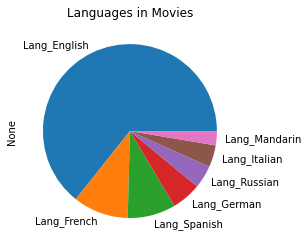

In [744]:
p1 = votes.plot(kind='pie', title='Languages in Movies')

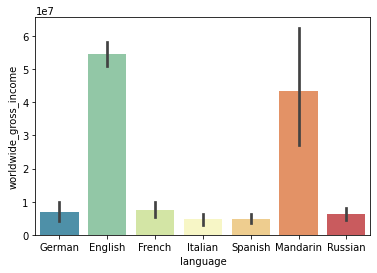

In [588]:
#creating a value list as plotting all languages would create an ugly and useless bar plot
#selecting the most popular languages (obtained from the previous plot) makes sense
value_list = ['Russian','English', 'French', 'Spanish', 'German','Italian', 'Mandarin']
data_prep = data[data.language.isin(value_list)]

s.barplot(x='language', y= 'worldwide_gross_income', data=data_prep, palette='Spectral_r')


From the pie plot we can see that English is the language in most of these movies with European Languages also common. The bar plot of languages shows that while English movies have the highest world gross income, Mandarin is close second. The standard deviation indicates that some Mandarin movies have higher world gross incomes than English movies. For movie producers/investors looking to achieve high gross incomes with their movies, English and Mandarin would be the best languages.

## 5.2 Genre

In [740]:
#showing the top 7 most used genres in the cleaned dataset

votes = data.filter(like='Genre_').sum(axis=0)/len(data)
votes = votes.sort_values(axis = 0, ascending = False)
votes.head(10)
votes = votes[:7]

Genre_Drama        0.564712
Genre_Comedy       0.370575
Genre_Action       0.220639
Genre_Crime        0.177709
Genre_Romance      0.171628
Genre_Thriller     0.157107
Genre_Adventure    0.148121
Genre_Horror       0.102469
Genre_Mystery      0.081594
Genre_Fantasy      0.069976
dtype: float64

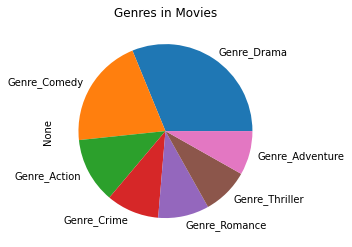

In [741]:
p1 = votes.plot(kind='pie', title='Genres in Movies')

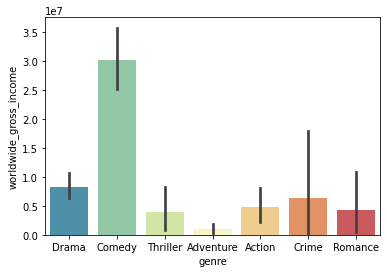

In [590]:

value_list = ['Comedy', 'Action', 'Crime', 'Drama','Adventure','Romance', 'Thriller'] #only plotting the most popular genres
data_prep = data[data.genre.isin(value_list)]

s.barplot(x='genre', y= 'worldwide_gross_income', data=data_prep, palette='Spectral_r')


The pie plot indicates that there is a relatively good split between movie genres when looking at the top 7 genres. However, when considering all genres, as seen in the table, Drama accounts for over half (56%) of genres in the dataset. The bar plot shows that comedy returns the most world gross income by a great majority. This is suprising as you would expect the genre with the most amount of movies (Drama) to have the highest world gross income. Another interesting observation is that the Crime genre has a high standard deviation indicating that a few Crime movies achieve high gross incomes. A recommendation for film producers/investors would be to focus on films with Comedy. 

## 5.3 Country

In [745]:
#showing the top 7 countries in my cleaned dataset

votes = data.filter(like='Country_').sum(axis=0)/len(data)
votes = votes.sort_values(axis = 0, ascending = False)
votes.head(10)
votes = votes[:7]

Country_USA        0.616718
Country_UK         0.142131
Country_France     0.123525
Country_Germany    0.085496
Country_Canada     0.070884
Country_Spain      0.039572
Country_Italy      0.037212
Country_India      0.034217
Country_China      0.030314
Country_Japan      0.026593
dtype: float64

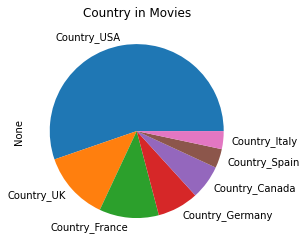

In [746]:
p1 = votes.plot(kind='pie', title='Country in Movies')


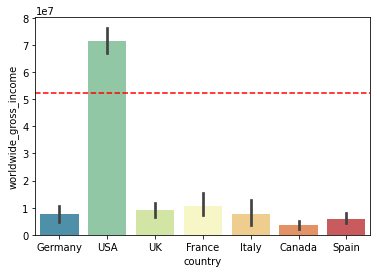

In [592]:
mean_income = data['worldwide_gross_income'].mean()


value_list = ['USA', 'UK', 'France', 'Germany','Canada','Spain', 'Italy']
data_prep = data[data.country.isin(value_list)]

s.barplot(x='country', y='worldwide_gross_income', data=data_prep, palette='Spectral_r').axhline(mean_income, color='red', linestyle='dashed')


The pie chart shows us that most of the movies are from the USA (61%) with the UK (14%) and France (12%) combined making up a quarter. This could indicate a bias in the dataset as the production of India's film industry (1,813 films produced in 2018) is greater than France's (300 films produed in 2018) (Statista.com). This bias in data may also come from the user base on IMDb, Indians may not use IMDb as much as people from the USA, UK or France. The USA makes the films with the highest worldwide gross income as the average US film gross income is higher than the average gross income of all films. 

## 5.4 Votes Variables 

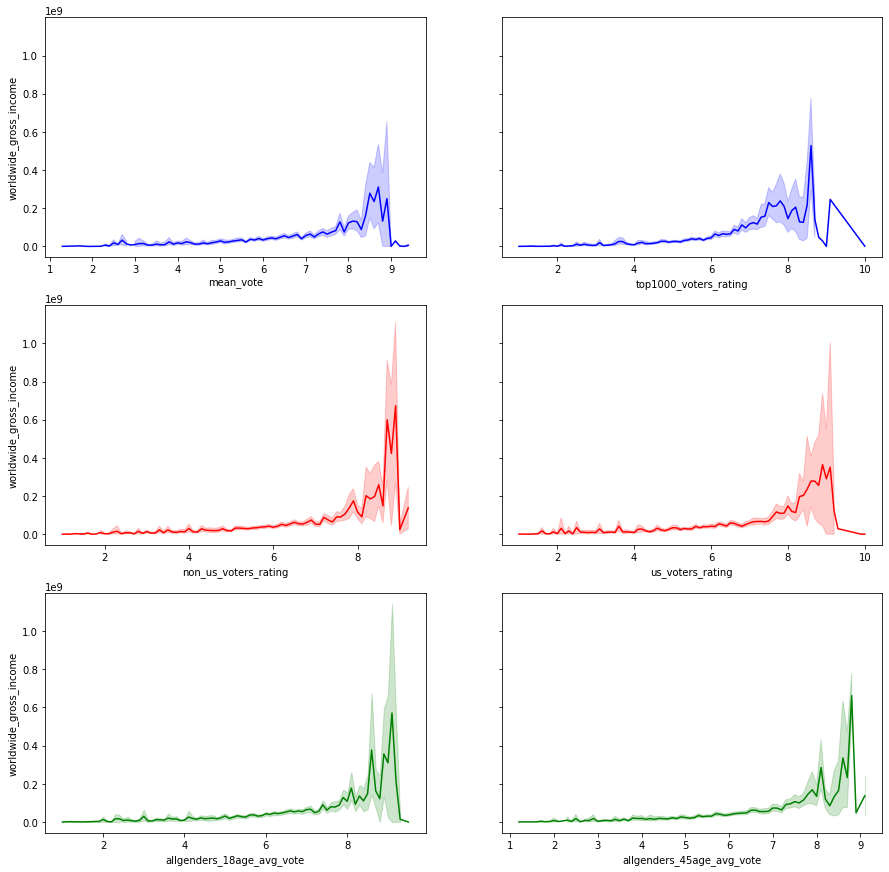

In [593]:
#lineplot for all vote variables

fige,axes = plt.subplots(3,2, figsize = (15,15), sharey=True) #creating a subplot to compare relevant lineplots next to each other

#mean_vote
s.lineplot(ax=axes[0,0],x='mean_vote',y='worldwide_gross_income',data=data,color='blue')
s.lineplot(ax=axes[0,1],x='top1000_voters_rating',y='worldwide_gross_income',data=data,color='blue')
s.lineplot(ax=axes[1,1],x='us_voters_rating',y='worldwide_gross_income',data=data,color='red')
s.lineplot(ax=axes[1,0],x='non_us_voters_rating',y='worldwide_gross_income',data=data,color='red')
s.lineplot(ax=axes[2,0],x='allgenders_18age_avg_vote',y='worldwide_gross_income',data=data,color='green')
s.lineplot(ax=axes[2,1],x='allgenders_45age_avg_vote',y='worldwide_gross_income',data=data,color='green')





From the line plots, we can observe that the higher the rating of a movie on IMDb the higher its worldwide gross income. It is interesting to see that high ratings of non-US voters translate to higher incomes in films than US voters. Simlarly the younger demographic provide the same benefit, higher ratings from users that are aged between 18 and 30 results in higher worldwide gross income. We can therefore recommend to film producers/investors to target the younger demographic and non-US viewers to optimise gross income. 

(1910.0, 2020.0, 0.0, 3000000000.0)

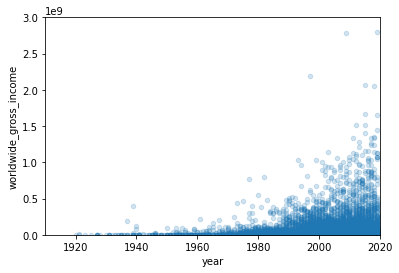

In [594]:
#plotting world gross income on time (years)
data.plot(kind="scatter", x="year", y="worldwide_gross_income",
             alpha=0.2)
plt.axis([1910, 2020, 0, 3000000000]) #adjusting the axis to provide an appropriate view


From the scatter plot, we can observe that as time has passed movies are reaching new heights in regards to world gross income. After the 1980s more and more movies were able to return a world gross income above $1 billion.

## 5.5 Distributions & Correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d5e7ada60>,
      dtype=object)

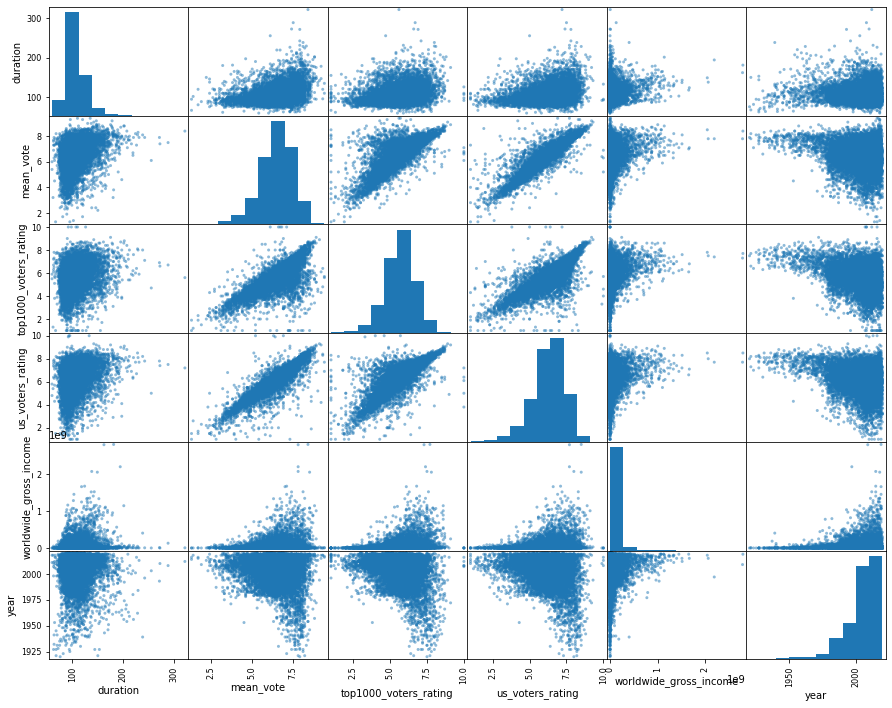

In [595]:
#Looking at correlation of  a few attributes
from pandas.plotting import scatter_matrix

attributes = ["duration", "mean_vote", "top1000_voters_rating", 
              "us_voters_rating","worldwide_gross_income","year"]
scatter_matrix(data[attributes], figsize=(15, 12))



Text(0.5, 1.0, 'Pearson Correlation of Variables')

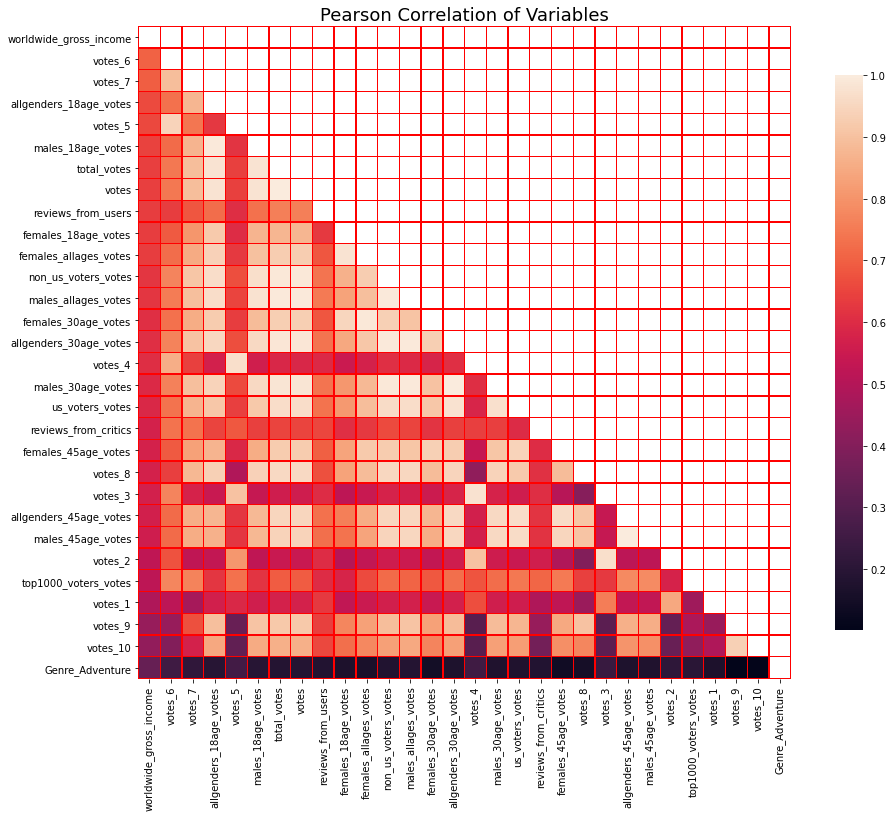

In [596]:
import numpy as np
import seaborn as s

dependentVariables = ['worldwide_gross_income', 'votes_6', 'votes_7', 'allgenders_18age_votes', 'votes_5', 'males_18age_votes', 'total_votes', 'votes', 'reviews_from_users', 'females_18age_votes', 'females_allages_votes', 'non_us_voters_votes', 'males_allages_votes', 'females_30age_votes', 'allgenders_30age_votes', 'votes_4', 'males_30age_votes', 'us_voters_votes', 'reviews_from_critics', 'females_45age_votes', 'votes_8', 'votes_3', 'allgenders_45age_votes', 'males_45age_votes', 'votes_2', 'top1000_voters_votes', 'votes_1', 'votes_9', 'votes_10', 'Genre_Adventure']
mask = np.zeros_like(data[dependentVariables].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of Variables',fontsize=18)
s.heatmap(data[dependentVariables].corr(),linewidths=0.30,vmax=1.00,square=True,
linecolor='r',mask=mask,cbar_kws={"shrink": 0.85})

The correlation matrix shows that the variables considering the number of IMDb votes appears to be the most correlated with worldwide gross income, specifically votes_5 (number of votes for a rating of 5) and votes_6.


In [597]:
#now that the data exploration is complete we are removing outliers 
#outliers = films below a worldwide gross income of $11,086 (5th percentile) and films with a gross income over $710,438,913 (99th percentile)
rr = sorted(data['worldwide_gross_income'])
q1, q3 = np.percentile(rr, [5,99])
print(q1,q3)

11086.000000000002 710438913.0800006


In [598]:
#removing films with outliers
data = data[data['worldwide_gross_income']< q3]
data = data[data['worldwide_gross_income']> q1]

In [599]:
#resetting the index
data.reset_index(drop=True, inplace=True)

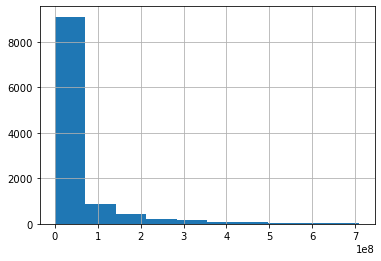

In [600]:
#checking the distribution of worldwide gross income after removing outliers
data['worldwide_gross_income'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d5dec2790>]],
      dtype=object)

Text(0.5, 1.0, 'Number of movies vs log(Worldwide Gross Income)')

Text(0, 0.5, 'Number of movies')

Text(0.5, 0, 'log(Worldwide Gross Income)')

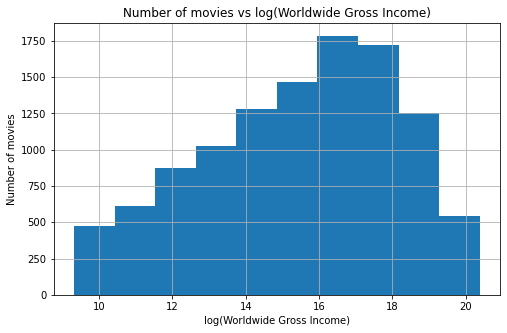

In [601]:
#to improve the distribution of worldwide gross income I will take the log of the target variable to see if it improves RMSE

data['log_gross_income'] = np.log(data['worldwide_gross_income'])

data.hist('log_gross_income',figsize=(8,5))
plt.title('Number of movies vs log(Worldwide Gross Income)')
plt.ylabel('Number of movies')
plt.xlabel("log(Worldwide Gross Income)")

In [602]:
#removing columns that have been converted into dummy variables (genre, country, language) now that EDA has been completed
data.drop(['genre','country','language'], axis=1, inplace=True)

# 6 Scaling and Feature Selection

## 6.1 Initial Linear Regression  (Base Model)

In [603]:
from sklearn.linear_model import LinearRegression


#preparing the data
y = data['worldwide_gross_income']
x = data[data.columns.difference(['worldwide_gross_income'])]

#checking all columns are included except the target variable (y)
x.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11018 entries, 0 to 11017
Data columns (total 406 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Country_Afghanistan                  float64
 1   Country_Albania                      float64
 2   Country_Algeria                      float64
 3   Country_Angola                       float64
 4   Country_Argentina                    float64
 5   Country_Armenia                      float64
 6   Country_Aruba                        float64
 7   Country_Australia                    float64
 8   Country_Austria                      float64
 9   Country_Azerbaijan                   float64
 10  Country_Bahamas                      float64
 11  Country_Bahrain                      float64
 12  Country_Bangladesh                   float64
 13  Country_Belarus                      float64
 14  Country_Belgium                      float64
 15  Country_Bhutan                     

### 6.1.1 Splitting the Data

Standard splitting as the dataset is large and does not require stratified sampling.

In [604]:
#test_size is 0.2 therefore it is 20% of the data while the train set will be 80%
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =train_test_split(x,y , test_size=0.2, random_state=42)

In [605]:
#checking if split worked
X_test.head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,...,votes_2,votes_3,votes_4,votes_5,votes_6,votes_7,votes_8,votes_9,weighted_average_vote,year
7015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2190,3739,7150,12978,14945,9507,4199,1472,5.4,2015
1418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,315,557,1049,2072,3903,4648,2923,1419,6.6,1990
6250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27,34,65,91,212,409,336,182,6.8,2006
3838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27,32,66,161,352,533,317,148,6.8,2002
6022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173,333,732,1478,2275,1616,761,286,5.8,2008


### 6.1.2 Running the Model

In [606]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #fitting the X_train and y_train data on a linear regression

y_pred = lin_reg.predict(X_train) #predicting y values using the X_train data
y_pred

LinearRegression()

array([-2.52730369e+06,  9.14954173e+06, -1.80330133e+07, ...,
        8.33175528e+06,  7.29054582e+07,  3.61012338e+08])

In [607]:
#printing key metrics to understand the accuracy of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred))

Mean Absolute Error: 26388216.379686654
Mean Squared Error: 2171048984802153.8
Root Mean Squared Error: 46594516.68171003
R^2 Score :           0.7485157809959921


In [608]:
#creating a function for the cross validations
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [609]:
#cross-validation to understand if the trained model is overfitting the training set
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores) #taking the square root to get the RMSE
display_scores(lin_reg_rmse_scores)

Scores: [2.42330904e+12 1.08817522e+13 1.90412663e+09 8.95989060e+07
 8.32753116e+11 6.15332195e+08 5.24835510e+07 4.51800481e+12
 1.09774174e+08 3.16424648e+12]
Mean: 2182283697756.2476
Standard deviation: 3282980988289.2075


The linear regression model without any adjustments provides a good base to compare with other models, it is extremely overfitting the data as the training set RMSE is a lot lower than the mean RMSE of the validaiton set.

## 6.2 MinMaxScaler & StandardScaler

Scaling the numerical variables to see if there is any improvement in the RMSE value.

In [610]:
#applying StandardScaler to numerical values

#selecting only numerical variables. Categorical dummy variables are ignored. 
list1 = data.columns.tolist()
list1 = list1[:49]  #the numerical variables are the first 49 columns
list1.remove('worldwide_gross_income') #removing our target variable as we do not want to Standardscale it
list1 #checking the list


from sklearn.preprocessing import StandardScaler, MinMaxScaler
data[list1] = StandardScaler().fit_transform(data[list1]) #applying StandardScaler



['weighted_average_vote',
 'total_votes',
 'mean_vote',
 'median_vote',
 'votes_10',
 'votes_9',
 'votes_8',
 'votes_7',
 'votes_6',
 'votes_5',
 'votes_4',
 'votes_3',
 'votes_2',
 'votes_1',
 'allgenders_18age_avg_vote',
 'allgenders_18age_votes',
 'allgenders_30age_avg_vote',
 'allgenders_30age_votes',
 'allgenders_45age_avg_vote',
 'allgenders_45age_votes',
 'males_allages_avg_vote',
 'males_allages_votes',
 'males_18age_avg_vote',
 'males_18age_votes',
 'males_30age_avg_vote',
 'males_30age_votes',
 'males_45age_avg_vote',
 'males_45age_votes',
 'females_allages_avg_vote',
 'females_allages_votes',
 'females_18age_avg_vote',
 'females_18age_votes',
 'females_30age_avg_vote',
 'females_30age_votes',
 'females_45age_avg_vote',
 'females_45age_votes',
 'top1000_voters_rating',
 'top1000_voters_votes',
 'us_voters_rating',
 'us_voters_votes',
 'non_us_voters_rating',
 'non_us_voters_votes',
 'year',
 'duration',
 'avg_vote',
 'votes',
 'reviews_from_users',
 'reviews_from_critics']

In [611]:
#checking if StandardScaler applied correctly
data.head(10)

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,Country_USA,Country_Ukraine,Country_UnitedArabEmirates,Country_Uruguay,Country_Venezuela,Country_Vietnam,Country_WestGermany,Country_Yemen,Country_Yugoslavia,log_gross_income
0,0.909002,-0.430135,1.366909,1.253021,-0.206398,-0.242833,-0.352447,-0.491703,-0.572782,-0.597855,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.032938
1,1.940636,0.438998,1.767798,1.253021,0.595295,0.668105,0.626961,0.108858,-0.212137,-0.244307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.200476
2,0.721432,-0.416382,0.665353,0.418406,-0.225774,-0.238343,-0.342144,-0.452336,-0.536167,-0.563655,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.326611
3,1.846851,0.344211,1.667576,1.253021,0.469847,0.501291,0.539184,0.109962,-0.210649,-0.278354,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.200476
4,1.002787,-0.373008,0.966020,0.418406,-0.212999,-0.216818,-0.285064,-0.377240,-0.499254,-0.552559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.329724
5,1.940636,0.824752,1.667576,1.253021,1.091619,1.033984,0.822940,0.359490,0.060096,0.078538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.115401
6,1.753066,-0.077406,1.467131,1.253021,0.165225,0.035024,-0.012371,-0.217442,-0.380180,-0.380193,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.704430
7,1.753066,-0.230394,1.467131,1.253021,-0.078679,-0.049826,-0.079511,-0.329698,-0.500966,-0.549975,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.200476
8,2.128206,0.878813,1.868020,2.087636,1.396348,1.250297,0.837651,0.236116,-0.112785,-0.120124,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.736571
9,1.190357,-0.085730,1.166464,1.253021,0.001096,-0.052855,0.001215,-0.043500,-0.217719,-0.304346,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.352804


In [612]:
#preparing the data
y1 = data['worldwide_gross_income']
x1 = data[data.columns.difference(['worldwide_gross_income'])]

In [613]:
from sklearn.model_selection import train_test_split

X_scaled_train,X_scaled_test, y_scaled_train, y_scaled_test =train_test_split(x1,y1 , test_size=0.2, random_state=42)


In [614]:
lin_scaled_reg = LinearRegression()
lin_scaled_reg.fit(X_scaled_train, y_scaled_train)

y_pred2 = lin_scaled_reg.predict(X_scaled_train)
y_pred2

LinearRegression()

array([-2.52974851e+06,  9.15225121e+06, -1.80374075e+07, ...,
        8.32683004e+06,  7.29132957e+07,  3.61042445e+08])

In [615]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_train, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_train, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_scaled_train, y_pred2)))
print("R^2 Score :          ", metrics.r2_score(y_scaled_train, y_pred2))

Mean Absolute Error: 26388848.75849405
Mean Squared Error: 2171053903956312.0
Root Mean Squared Error: 46594569.46851545
R^2 Score :           0.7485152111840486


In [616]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_scaled_reg, X_scaled_train, y_scaled_train,
                                scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [7.43219952e+17 4.55579459e+07 1.85564153e+17 6.02572877e+07
 4.59364785e+07 4.86137831e+07 5.21360274e+07 8.77439547e+17
 4.99744076e+07 5.90624676e+07]
Mean: 1.8062236520593453e+17
Standard deviation: 3.210086792435651e+17


We can see that the metrics of the MinMaxScaled and StandardScaled data are worse as they overfit the training set to a greater extent than when the data was not scaled. This can be seen by the large mean RMSE for the validation set for the StandardScaled data (1.8062236520593453e+17) while the RMSE for the validation set of the original dataset was 2,182,283,697,756.

In [617]:
# Results from MinMaxScaler
# Mean Absolute Error: 26388848.758494
# Mean Squared Error: 2171053903956315.2
# Root Mean Squared Error: 46594569.468515486
# R^2 Score :           0.7485152111840483
    
# CrossValidation
# Mean: 2.7238482527702236e+16
# Standard deviation: 8.161159855493517e+16

## 6.3 Log of Target Variable

Running a linear regression where the (y) is the log of worldwide_gross_income to check if the results will improve by skewing the data to a normal distribution. 

In [618]:
#preparing the data
y_log = data['log_gross_income']
del x["log_gross_income"]


In [619]:
#generic splitting of data as the data is extremely large not requiring stratified sampling
from sklearn.model_selection import train_test_split

X_log_train,X_log_test, y_log_train, y_log_test =train_test_split(x,y_log , test_size=0.2, random_state=42)

In [620]:
X_test.head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,...,votes_2,votes_3,votes_4,votes_5,votes_6,votes_7,votes_8,votes_9,weighted_average_vote,year
7015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2190,3739,7150,12978,14945,9507,4199,1472,5.4,2015
1418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,315,557,1049,2072,3903,4648,2923,1419,6.6,1990
6250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27,34,65,91,212,409,336,182,6.8,2006
3838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27,32,66,161,352,533,317,148,6.8,2002
6022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173,333,732,1478,2275,1616,761,286,5.8,2008


In [621]:
log_reg = LinearRegression()
log_reg.fit(X_log_train, y_log_train)


log_y_pred = log_reg.predict(X_log_train)
log_y_pred


#transforming the log values back to their original value by taking the exponent of the log value
y_train = np.exp(y_log_train)

y_pred = np.exp(log_y_pred)
y_pred


LinearRegression()

array([13.85613178, 14.90697423, 12.91473012, ..., 14.08763908,
       17.19596007, 19.20724005])

array([1.04145755e+06, 2.97863062e+06, 4.06252480e+05, ...,
       1.31275571e+06, 2.93839766e+07, 2.19582824e+08])

In [622]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df['Difference'] = abs((df['Predicted']-df['Actual']))
df.head(15) #Show a table for the difference between the actual and predicted results

,Actual,Predicted,Difference
1921,70936.0,1.041458e+06,9.705216e+05
4047,6415017.0,2.978631e+06,3.436386e+06
5174,1297446.0,4.062525e+05,8.911935e+05
4847,86957280.0,4.451965e+07,4.243763e+07
1419,5017971.0,2.888793e+07,2.386996e+07
9341,111928365.0,7.981466e+07,3.211371e+07
5820,1945355.0,1.037213e+06,9.081416e+05
2025,116112375.0,1.978024e+08,8.168998e+07
594,19629760.0,1.701093e+07,2.618827e+06
1558,2712293.0,1.457471e+05,2.566546e+06


In [623]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred))

Mean Absolute Error: 42647915.31228409
Mean Squared Error: 1.7299350590771098e+17
Root Mean Squared Error: 415924880.12586
R^2 Score :           -19.038763303136847


The model scores are extremely high and with a negative R^2, indicating the model to be unreliable. The base linear regression performed better. 

## 6.4 Feature Selection

In [624]:
#Investigating the features in the data to improve the RMSE score.
from matplotlib import pyplot

#looking at the coeficient importance of all features
importance = lin_reg.coef_
# printing the feature importance of all variables
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -31280303.93496
Feature: 1, Score: 6220872.25157
Feature: 2, Score: -7776053.57489
Feature: 3, Score: 37661021.96996
Feature: 4, Score: -4451101.07059
Feature: 5, Score: 27806125.49176
Feature: 6, Score: 6923262.53643
Feature: 7, Score: 1905879.96533
Feature: 8, Score: 8023583.32779
Feature: 9, Score: 53110717904236.63281
Feature: 10, Score: 103762024.28716
Feature: 11, Score: -142296339327258.59375
Feature: 12, Score: 22541674.55885
Feature: 13, Score: 31002339.09998
Feature: 14, Score: -6633145.51714
Feature: 15, Score: 40930944.66123
Feature: 16, Score: -26915167.74933
Feature: 17, Score: 1512066068933.12695
Feature: 18, Score: 1682708.85680
Feature: 19, Score: -12776556.56578
Feature: 20, Score: -3375386309884.95020
Feature: 21, Score: -11730611.69968
Feature: 22, Score: -2813493790527.93945
Feature: 23, Score: -29552762.41014
Feature: 24, Score: 3684918.59116
Feature: 25, Score: -24367036.17501
Feature: 26, Score: 856511704895.67542
Feature: 27, Score: -5206439.

In [724]:
#taking the log of the important of the coeffecient as it makes it easier to compare values
#filter on values that are above 30 to find the features with the highest importance
importance = np.log(lin_reg.coef_)
# printing the feature importance of all variables
for i,v in enumerate(importance):
    if v > 30:
        print('Feature: %0d, Score: %.5f' % (i,v)) 

In [626]:
#  9   Country_Azerbaijan                   float64
#  394 votes_1                              int64  
#  395 votes_10                             int64  
#  396 votes_2                              int64  
#  397 votes_3                              int64  
#  398 votes_4                              int64  
#  399 votes_5                              int64  
#  400 votes_6                              int64  
#  401 votes_7                              int64  
#  402 votes_8                              int64  
#  403 votes_9                              int64

Looking at the selected most important features, the rating (number of votes for each rating 1 to 10 on IMDB) seems to be logical to predict worldwide gross income. These variables were also previously found to be strongly correlated to worldwide_gross_income in the correlation matrix plot. However, the country origin of the movie being in Azerbaijan, is confusing. This may be related to a small sample size of movies from Azerbaijan that have extremely low or high gross incomes.

While the feature importance variables found previously could be effective, another approach to feature selection would be to select the variables which are most postively correlated with worldwide_gross_income. 

The following code attempts to reduce the number of variables used by selecting the 10, 20 or 30 most correlated variables with worldwide gross income to see if it will improve the RMSE of the Linear Regression Model. The variables selected previously with the coeffecient importance will also be tested. The best number of variables will be used for subsequent models. 

In [627]:
#top 30 most correlated variables to worldwide_gross_income (n + 1 as world_gross_income is also included)
corr_matrix = data.corr()
corr = corr_matrix["worldwide_gross_income"].sort_values(ascending=False)
corr10 = corr.head(11)
corr20  = corr.head(21)
corr30 = corr.head(31)


In [628]:
print(corr30)

worldwide_gross_income    1.000000
votes_6                   0.760684
votes_5                   0.720470
votes_7                   0.710280
votes_4                   0.661498
allgenders_18age_votes    0.627919
females_allages_votes     0.625774
total_votes               0.624506
votes                     0.624506
non_us_voters_votes       0.624293
log_gross_income          0.621694
females_30age_votes       0.615841
allgenders_30age_votes    0.615678
males_allages_votes       0.613894
males_18age_votes         0.612321
females_18age_votes       0.604955
males_30age_votes         0.603997
votes_3                   0.602053
top1000_voters_votes      0.598239
us_voters_votes           0.594637
females_45age_votes       0.588959
allgenders_45age_votes    0.583390
males_45age_votes         0.576942
reviews_from_users        0.573461
reviews_from_critics      0.554274
votes_8                   0.544820
votes_2                   0.533832
votes_1                   0.422156
votes_9             

In [629]:


list_coef_important = ['votes_1','votes_2','votes_3','votes_4','votes_5','votes_6','votes_7','votes_8','votes_9','votes_10','Country_Azerbaijan']

list10 = corr10.index.tolist()
list10.remove('worldwide_gross_income')

list30 = corr30.index.tolist()
list30.remove('worldwide_gross_income')

list20 = corr20.index.tolist()
list20.remove('worldwide_gross_income')


In [630]:
#copypasting from the above results for the variable x (and removing worldwide_gross_income)

#preparing the data
y_im = data['worldwide_gross_income']
x_coef = data[list_coef_important]
x_10 = data[list10]
x_20 = data[list20]
x_30 = data[list30]




### 6.4.1 Important Coefficient Variables

In [631]:
#making sure x and y have the same number of rows
print(x_coef.shape)
print(y_im.shape)

(11018, 11)
(11018,)


In [632]:
#generic splitting of data as the data is extremely large not requiring stratified sampling
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(x_coef, y_im , test_size=0.2, random_state=42)

In [633]:
#running the linear regression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train)

y2_pred = lin_reg2.predict(X2_train)
y2_pred


LinearRegression()

array([2.02696945e+06, 7.33318025e+06, 9.05940577e+06, ...,
       1.83579719e+06, 5.58042402e+07, 2.93816765e+08])

In [634]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_train, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_train, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_train, y2_pred)))
print("R^2 Score :          ", metrics.r2_score(y2_train, y2_pred))

Mean Absolute Error: 28102654.98610489
Mean Squared Error: 3450076647047517.0
Root Mean Squared Error: 58737353.081727445
R^2 Score :           0.600359164090543


### 6.4.2  Correlated variables (10)

In [635]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x_10, y_im , test_size=0.2, random_state=42)

In [636]:
#running the linear regression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y2_train)

y2_pred = lin_reg2.predict(X2_train)
y2_pred


LinearRegression()

array([-2.23358943e+07,  1.93576436e+07,  1.90389164e+06, ...,
        8.43227405e+06,  8.11019624e+07,  3.41676534e+08])

In [637]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_train, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_train, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_train, y2_pred)))
print("R^2 Score :          ", metrics.r2_score(y2_train, y2_pred))

Mean Absolute Error: 29505937.88178323
Mean Squared Error: 2861497003455065.5
Root Mean Squared Error: 53492962.186207876
R^2 Score :           0.6685374931041529


### 6.4.3 Correlated Variables (20)


In [638]:
X_restricted_train, X_restricted_test, y_restricted_train, y_restricted_test = train_test_split(x_20, y_im , test_size=0.2, random_state=42)

In [639]:
#running the linear regression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_restricted_train, y_restricted_train)

y2_pred = lin_reg2.predict(X_restricted_train)
y2_pred


LinearRegression()

array([-2.27821883e+07,  1.81805756e+07,  2.19280530e+06, ...,
        1.77167606e+07,  5.24323383e+07,  4.04943871e+08])

In [640]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y2_pred)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y2_pred))

Mean Absolute Error: 27690410.060575537
Mean Squared Error: 2581825040574918.0
Root Mean Squared Error: 50811662.44647894
R^2 Score :           0.7009333928072824


### 6.4.4 Correlated Variables (30)

In [641]:
X_restricted_train, X_restricted_test, y_restricted_train, y_restricted_test = train_test_split(x_30, y_im , test_size=0.2, random_state=42)

In [642]:
#running the linear regression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_restricted_train, y_restricted_train)

y2_pred = lin_reg2.predict(X_restricted_train)
y2_pred

LinearRegression()

array([-2.08141730e+07,  1.58238190e+07,  6.75541809e+04, ...,
        1.89521440e+07,  6.67366615e+07,  3.78205335e+08])

In [643]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y2_pred)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y2_pred))

Mean Absolute Error: 27291459.047283202
Mean Squared Error: 2496439961077843.0
Root Mean Squared Error: 49964386.927869365
R^2 Score :           0.710824003374908


In [644]:
data['worldwide_gross_income'].mean()

44753072.04665093

In [645]:
#calculating the MAE relative to the mean of worldwide_gross_income
metrics.mean_absolute_error(y_restricted_train, y2_pred)/data['worldwide_gross_income'].mean()

0.6098231428411078

In [646]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg2, X_restricted_train, y_restricted_train,
                                scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [49702866.2393319  45840487.20349284 50650005.09517199 58502198.31564648
 46745822.92320934 49069893.36145604 53255075.1370667  50461837.94485867
 52228909.44503297 60329798.87806598]
Mean: 51678689.45433329
Standard deviation: 4425563.157094854


In [647]:
#calculating how strongly the model overfits the training data
#validation mean RMSE/training set RMSE
#51678689/49964386 = 1.0343
#3.4%


The optimal number of variables (the model with the lowest RMSE) is selecting the top 30 most correlated variables to worldwide gross income as it has the lowest RMSE. Furthermore, the data is not overfitting, the mean RMSE of the validation set is only 3.4% higher than the training set.

Lastly, the MAE is roughly 60.9% of the mean of world_gross_income, 44,753,072. Reducing this to around 1% would be ideal as this would mean we could predict the worldwide_gross_income of a movie to approximately +- $450,000 relative to its actual gross income. We shall continue to experiment with other models and see if it improves. 

## 6.5 Principle Component Analysis

In [648]:
#trying to see if PCA compresses all features into a better set of componenets to decrease RMSE
from sklearn.decomposition import PCA

#reseting the x,y variables to make sure they are the right ones
y = data['worldwide_gross_income']
x = data[data.columns.difference(['worldwide_gross_income'])]

#checking if the MinMaxScaler is still applied to the x variables
x.head()

#PCA for 20 componnents, compressing all 407 features into 20 components
pca = PCA(n_components = 20)
X20D = pca.fit_transform(x)



,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,...,votes_2,votes_3,votes_4,votes_5,votes_6,votes_7,votes_8,votes_9,weighted_average_vote,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.506340,-0.549003,-0.586284,-0.597855,-0.572782,-0.491703,-0.352447,-0.242833,0.909002,-6.803387
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.153163,-0.290187,-0.202076,-0.244307,-0.212137,0.108858,0.626961,0.668105,1.940636,-6.803387
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.498457,-0.544130,-0.563075,-0.563655,-0.536167,-0.452336,-0.342144,-0.238343,0.721432,-6.639565
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.184697,-0.246330,-0.329100,-0.278354,-0.210649,0.109962,0.539184,0.501291,1.846851,-6.475743
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.502398,-0.534925,-0.556175,-0.552559,-0.499254,-0.377240,-0.285064,-0.216818,1.002787,-6.311920


In [649]:
X20D[:2]

array([[ 0.6319581 , -4.58046011, -1.7167401 , -1.21714251,  4.92848511,
         2.31195263, -0.20095429, -2.41031674,  0.43180508,  0.35818236,
        -0.79593673, -0.83900357,  2.30854117,  0.1315505 , -0.76618426,
        -0.17305921,  1.50406451, -0.66691807, -0.31537711, -0.3186646 ],
       [ 4.08101615, -7.48483027,  3.95882671,  2.05946681,  6.65150443,
        -1.3056387 ,  1.72179596, -0.78292387,  0.74739022,  0.63672094,
        -0.08680726, -1.33894268,  1.44034924,  0.05088934,  0.0108152 ,
         0.36399449,  0.78157959, -0.44861404, -0.06880599,  0.28079924]])

In [650]:
X20D_inv = pca.inverse_transform(X20D)

In [651]:
np.mean(np.sum(np.square(X20D_inv - x), axis=1))

3.453381155534983

In [652]:
pca.components_

array([[ 1.19269162e-05, -9.11235394e-06, -3.44368004e-06, ...,
         1.44892556e-01,  1.26233711e-01, -2.75268320e-02],
       [-7.80745630e-05, -2.04785369e-05, -8.62946686e-05, ...,
         4.65956552e-02, -2.03149791e-01,  4.55610770e-02],
       [-5.53886645e-05,  4.10417300e-05, -1.51831915e-05, ...,
         2.08723430e-01, -3.03448428e-02,  2.18643260e-02],
       ...,
       [-1.90529750e-05,  1.40490558e-04, -9.40899896e-04, ...,
        -1.09400323e-01, -2.35400950e-02,  1.32334873e-01],
       [ 9.28211977e-04,  3.31785059e-04, -9.16550038e-05, ...,
        -3.21277328e-02, -2.87559718e-06,  3.60573574e-02],
       [-6.39395382e-04, -4.00924846e-04,  1.69598260e-03, ...,
        -5.86253616e-02,  1.92579019e-02, -5.62129959e-02]])

In [653]:
pca.explained_variance_ratio_

array([0.47817556, 0.21834929, 0.08966812, 0.03456615, 0.02191815,
       0.01768075, 0.01380105, 0.01068981, 0.00896806, 0.00663678,
       0.00614667, 0.00504802, 0.00470047, 0.00446379, 0.00408186,
       0.0039269 , 0.00350609, 0.00337795, 0.00289636, 0.00272041])

The first dimension explains 47.8% of the variance. After the 8th components, subsequent components only explain less than 1% of the variance.  

In [654]:
1 - pca.explained_variance_ratio_.sum()

0.05867778531473067

By projecting down to 20 components, we lose about 5.8% of the variance. 

In [655]:
#running a linear regression on the 20 comprossed components
X_train3, X_test3, y_train3, y_test3 = train_test_split(X20D, y , test_size=0.2, random_state=42)

In [656]:
#running the linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train3, y_train3)

y_pred = lin_reg.predict(X_train3)
y_pred

LinearRegression()

array([-1.80403582e+07, -1.85823828e+06, -1.06862815e+07, ...,
        1.29684877e+07,  6.90258363e+07,  3.05678377e+08])

In [657]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train3, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train3, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train3, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_train3, y_pred))


Mean Absolute Error: 30537138.072102208
Mean Squared Error: 2879521943129787.5
Root Mean Squared Error: 53661177.24323412
R^2 Score :           0.6664495679083494


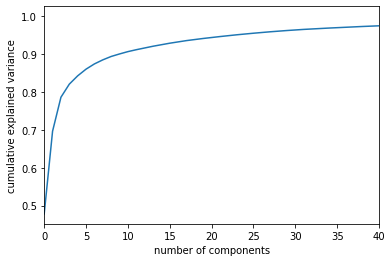

In [658]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim([0, 40])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The PCA plot shows that in order to keep 95% of the explained variance we would need to compress the features into roughly 30 components. We will therefore re-run the PCA with 30 components. 

In [659]:
pca = PCA(n_components = 30)
X30D = pca.fit_transform(x)

In [660]:
#running a linear regression on the 20 comprossed components
X_train3, X_test3, y_train3, y_test3 = train_test_split(X30D, y , test_size=0.2, random_state=42)

In [661]:
#running the linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train3, y_train3)

y_pred = lin_reg.predict(X_test3)
y_pred

LinearRegression()

array([88057149.64961231, 24646290.39105676,  2959354.7476439 , ...,
       12827711.95097524, 33041735.52661105,  4208679.42675079])

In [662]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test3, y_pred))

Mean Absolute Error: 30316928.617411163
Mean Squared Error: 2787634008759691.0
Root Mean Squared Error: 52798049.289341085
R^2 Score :           0.6511886861867106


While increasing the number of components of the PCA from 20 to 30 improves the metrics, the RMSE is still higher than the 30 correlated variable model, therefore PCA components will not be used. 

# 7 Experimenting with Various Models

## 7.1 Ridge Regression

In [663]:
from sklearn.linear_model import Ridge

#running a Ridge regression on the restricted dataset

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

ridge_reg.fit(X_restricted_train, y_restricted_train)

y_pred2 = ridge_reg.predict(X_restricted_train)
y_pred2


Ridge(alpha=1, random_state=42, solver='cholesky')

array([-2.17959513e+07,  1.53809404e+07,  1.83863529e+06, ...,
        1.94460073e+07,  6.19924734e+07,  3.83207881e+08])

In [664]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y_pred2)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y_pred2))

Mean Absolute Error: 27775669.352764517
Mean Squared Error: 2558055820631039.5
Root Mean Squared Error: 50577226.304247245
R^2 Score :           0.7036867087185148


In [665]:
from sklearn.model_selection import cross_val_score

ridge_reg_scores = cross_val_score(ridge_reg, X_restricted_train, y_restricted_train,
                                scoring="neg_mean_squared_error", cv=10)
ridge_reg_rmse_scores = np.sqrt(-ridge_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [49702866.2393319  45840487.20349284 50650005.09517199 58502198.31564648
 46745822.92320934 49069893.36145604 53255075.1370667  50461837.94485867
 52228909.44503297 60329798.87806598]
Mean: 51678689.45433329
Standard deviation: 4425563.157094854


In [666]:
#testing on the full dataset to see if the metrics are better
ridge_reg2 = Ridge(alpha=1, solver="cholesky", random_state=42)

ridge_reg2.fit(X_train, y_train)

y_pred4= ridge_reg2.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))


Ridge(alpha=1, random_state=42, solver='cholesky')

Mean Absolute Error: 26464251.556265432
Mean Squared Error: 2180216117183473.8
Root Mean Squared Error: 46692784.42311482
R^2 Score :           0.7474539030081804


In [667]:
from sklearn.model_selection import cross_val_score

ridge_reg_scores = cross_val_score(ridge_reg2, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
ridge_reg_rmse_scores = np.sqrt(-ridge_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [49702866.2393319  45840487.20349284 50650005.09517199 58502198.31564648
 46745822.92320934 49069893.36145604 53255075.1370667  50461837.94485867
 52228909.44503297 60329798.87806598]
Mean: 51678689.45433329
Standard deviation: 4425563.157094854


In [668]:
#Ridge Regression (Full dataset)
#50318448/46692784 = 1.077
#%7.7 overfitting
#Validation set RMSE: 50318448

#Ridge Regression (Restricted Dataset)
#51678689/49964386 = 1.0343
#3% overfitting
#Validation set RMSE: 51678689

There is a lower RMSE on the Ridge regression on the full dataset than the restricted dataset. However, even if the RMSE of the Ridge regression on the full dataset performs better, there is more overfitting (7.7%). 

## 7.2 Lasso regression


In [669]:
from sklearn.linear_model import Lasso


#running a Lasso regression on the restricted dataset
lasso_reg = Lasso(alpha=0.1, max_iter=30)

lasso_reg.fit(X_restricted_train, y_restricted_train)

y_pred4= lasso_reg.predict(X_restricted_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y_pred4))

Lasso(alpha=0.1, max_iter=30)

Mean Absolute Error: 28742064.32822629
Mean Squared Error: 2676307571627232.0
Root Mean Squared Error: 51733041.39162158
R^2 Score :           0.6899889757547217


In [670]:
#testing on the full dataset
lasso_reg = Lasso(alpha=0.1, max_iter=30)

lasso_reg.fit(X_train, y_train)

y_pred4= lasso_reg.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))


Lasso(alpha=0.1, max_iter=30)

Mean Absolute Error: 27927214.68234979
Mean Squared Error: 2382007483020040.5
Root Mean Squared Error: 48805814.02886382
R^2 Score :           0.7240793295211683


In [671]:
import warnings
warnings.filterwarnings("ignore")

In [672]:
lasso_reg_scores = cross_val_score(lasso_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
lasso_reg_rmse_scores = np.sqrt(-lasso_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [49702866.2393319  45840487.20349284 50650005.09517199 58502198.31564648
 46745822.92320934 49069893.36145604 53255075.1370667  50461837.94485867
 52228909.44503297 60329798.87806598]
Mean: 51678689.45433329
Standard deviation: 4425563.157094854


## 7.3 ElasticNet regression

In [673]:
#running ElasticNet regressor on the restricted dataset
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

elastic_net.fit(X_train, y_train)

y_pred4= elastic_net.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))

ElasticNet(alpha=0.1, random_state=42)

Mean Absolute Error: 26967336.290703487
Mean Squared Error: 2377831836132945.5
Root Mean Squared Error: 48763017.09423798
R^2 Score :           0.7245630170397772


In [674]:

elastic_reg_scores = cross_val_score(elastic_net, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
elastic_reg_rmse_scores = np.sqrt(-elastic_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [49702866.2393319  45840487.20349284 50650005.09517199 58502198.31564648
 46745822.92320934 49069893.36145604 53255075.1370667  50461837.94485867
 52228909.44503297 60329798.87806598]
Mean: 51678689.45433329
Standard deviation: 4425563.157094854


The Lasso and ElasticNet regressions both perform similar to the Ridge regression.

## 7.4 Stochastic Gradient Descent Regressor

In [675]:
#running SGD regressor (full dataset)
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(alpha = 0.01, max_iter=1000, tol=0.5, penalty= 'l1', eta0=0.01, random_state=42)
sgd_reg.fit(X_train, y_train)

y_pred4= sgd_reg.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))

SGDRegressor(alpha=0.01, penalty='l1', random_state=42, tol=0.5)

Mean Absolute Error: 9.890535724729979e+18
Mean Squared Error: 5.261935114640129e+38
Root Mean Squared Error: 2.2938908244814373e+19
R^2 Score :           -6.09518095638744e+22


## 7.5 Support Vector Regression

In [676]:
#running SVM regressor on the restricted dataset
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly")
svm_reg.fit(X_restricted_train, y_restricted_train)
y_pred4= svm_reg.predict(X_restricted_train)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y_pred4))

SVR(kernel='poly')

Mean Absolute Error: 43375281.11266003
Mean Squared Error: 1.0066629506967062e+16
Root Mean Squared Error: 100332594.43952928
R^2 Score :           -0.16607155217781266


In [677]:
#running SVM on the full dataset 

svm_reg.fit(X_train, y_train)

y_pred4= svm_reg.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))

SVR(kernel='poly')

Mean Absolute Error: 43242419.365825966
Mean Squared Error: 9987261969405684.0
Root Mean Squared Error: 99936289.55192246
R^2 Score :           -0.1568779856863991


The Support Vector Regression and SGD Regressor provide very poor results.

## 7.6 Decision Tree

In [678]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, random_state=42)
tree_reg.fit(X_restricted_train, y_restricted_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [679]:
y_pred4= tree_reg.predict(X_restricted_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y_pred4))

Mean Absolute Error: 42128.07036492252
Mean Squared Error: 4317710234.82481
Root Mean Squared Error: 65709.28575798713
R^2 Score :           0.9999994998565238


In [680]:

#training the Decision Tree on full dataset
tree2_reg = DecisionTreeRegressor(criterion = 'mse', max_depth= 10, random_state=42)
tree2_reg.fit(X_train, y_train)

y_pred5= tree2_reg.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred5)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred5))



DecisionTreeRegressor(max_depth=10, random_state=42)

Mean Absolute Error: 42128.07036492216
Mean Squared Error: 4317710234.825019
Root Mean Squared Error: 65709.28575798872
R^2 Score :           0.9999994998565238


The decision tree performs the same on both full datasets.

In [681]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10, n_jobs = 4)
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)
display_scores(tree_reg_rmse_scores)

Scores: [ 582458.17702422  606169.13370237  646452.11615616  516202.61934606
  451142.01381315  991288.23590354  479259.36997553  559757.68679087
  708617.09036211 1221263.44321993]
Mean: 676260.9886293944
Standard deviation: 232507.4311319802


In [682]:
# validation mean RMSE/training set RMSE
# 676260/65709 = 10.2
#102%

While the Decision Tree provides very good scores it is extremely overfitting as the validation set mean RMSE is significantly higher (102%) than the training set. 

## 7.7 RandomForest

In [683]:
#Running RandomForest on all varialbes
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

y_pred4= forest_reg.predict(X_train)

RandomForestRegressor(random_state=42)

In [684]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))

Mean Absolute Error: 27184.77268361064
Mean Squared Error: 21096033772.01627
Root Mean Squared Error: 145244.73750197035
R^2 Score :           0.9999975563335446


In [685]:
forest_reg.fit(X_restricted_train, y_restricted_train)
y_pred4= forest_reg.predict(X_restricted_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y_pred4))

RandomForestRegressor(random_state=42)

Mean Absolute Error: 26227.64864164973
Mean Squared Error: 18471027486.53452
Root Mean Squared Error: 135908.15827806114
R^2 Score :           0.9999978604020664


In [686]:
forest_reg_scores = cross_val_score(forest_reg, X_restricted_train, y_restricted_train,
                                scoring="neg_mean_squared_error", cv=10, n_jobs = 4)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_rmse_scores)

Scores: [326824.7684275  379358.7579531  307979.51618975 302412.68228895
 370427.62828261 314074.66353468 310563.94704377 355556.28814403
 302172.41824151 812338.61236115]
Mean: 378170.9282467036
Standard deviation: 147252.08058827557


In [687]:
# validation mean RMSE/training set RMSE
# 378170/135908 = 2.78
# 278%

The RandomForest performs best on the restricted train set as the RMSE is lower. There is a large amount of overfitting with the random forest model as the training set RMSE is a lot lower than the validation set mean RMSE. The RandomForest so far is the best model as the mean validation RMSE is lowest (378,170), however the overfitting is extreme (278%). 

## 7.8 XGBoost Regressor

In [688]:
!pip install xgboost



         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [689]:

import xgboost

model = xgboost.XGBRegressor(enable_categorical=True, colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=10,
                 min_child_weight=1.5,
                 n_estimators=410,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 seed=42) 

In [690]:
#training XGB Regressor on restricted dataset
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_restricted_train, y_restricted_train)
y_pred4 = xgb_reg.predict(X_restricted_train)
    
print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_train, y_pred4))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Mean Absolute Error: 97411.05424636969
Mean Squared Error: 26324612549.688103
Root Mean Squared Error: 162248.61339835267
R^2 Score :           0.999996950679292


In [691]:
#training XGB Regressor on full dataset
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred4 = xgb_reg.predict(X_train)
    
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Mean Absolute Error: 101412.29328967455
Mean Squared Error: 26991085874.909313
Root Mean Squared Error: 164289.64019349884
R^2 Score :           0.999996873478121


## 7.9 Multi-layer Perceptron Regressor (Neural Network)

In [692]:
#testing the MLP regressor on the full dataset
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=800)
mlp.fit(X_train, y_train)
y_pred4 = mlp.predict(X_train)


MLPRegressor(max_iter=800, random_state=1)

In [693]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_train, y_pred4))

Mean Absolute Error: 26927294.519288786
Mean Squared Error: 3130861886041904.5
Root Mean Squared Error: 55954105.17595563
R^2 Score :           0.6373355176541928


# 8 Finetuning 

The 3 best models that were tested and that will be finetuned are a Decision tree (full dataset), a RandomForest (30 variables) and a XGB Regressor (30 variables). The fine-tuned models will now be evaluated on the test set.

## 8.1 Decision Tree

In [694]:
#check current parameters used by the model
from pprint import pprint
print('Parameters currently in use:\n')
pprint(tree_reg.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


### 8.1.1 Grid Search

In [695]:
from sklearn.model_selection import GridSearchCV

#choose hyperparameters

param_grid = {'max_depth': [5, 10, 20,25],'criterion': ['mse','friedman_mse','mae'],
              'min_samples_split': [3,15,30], 'max_features': [10,30, X_train.shape[1]]}
             
    
tree_reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, n_jobs = -1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 20, 25],
                         'max_features': [10, 30, 406],
                         'min_samples_split': [3, 15, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [696]:
grid_search.best_params_ # best hyperparamters

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 406,
 'min_samples_split': 3}

In [697]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20, max_features=406,
                      min_samples_split=3, random_state=42)

In [698]:
tree = grid_search.best_estimator_ # store the estimator with the best scoring hyperparameter combination

In [699]:
y_pred4 = tree.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred4))

Mean Absolute Error: 134955.93942830936
Mean Squared Error: 547514731031.49524
Root Mean Squared Error: 739942.383589084
R^2 Score :           0.9999314905285044


In [700]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10, n_jobs = 4)
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)
display_scores(tree_reg_rmse_scores)

Scores: [ 495520.28737855  568938.68817887  641933.48344975  709968.64929686
  738482.87013539  939291.19498825  484537.61790733  534648.39732433
  745866.66710697 1330028.17307239]
Mean: 718921.6028838684
Standard deviation: 242986.7263864064


In [701]:
#Test set RMSE/Validation RMSE
# 739942/718921 = 1.029
# 2.9%
# Test RMSE = 739,942


The model is not overfitting on the training set as the validation RMSE (training set) is similar to the test RMSE. 

### 8.1.2 Random Search

In theory using a Randomised Search would be more suitable given our dataset as the hyperparameter search space is large. 

In [702]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param= {'max_depth': randint(5,35), #maxdepth was 10 on the grid search giving us a window to narrow down this parameter, a max_depth too high will overfit the data
        'max_features': randint(350,410),#with the gridsearch providing us with the highest 406 max_features, it is evident the optimal number of features is on the higher end
        'max_leaf_nodes': randint(0,35), #restricting the number of leaf nodes to ensure model is not overfitting
        'min_impurity_decrease': randint(0.0,10.0),
        'min_samples_leaf': randint(5,10), #an important parameter to ensure the smoothing of the model, we have increased the minimum to 5. 
        'min_samples_split': randint(3,10), #another important parameter that ensures theh model to not overfit our data
        'ccp_alpha': randint(0.0,10.0)
       }


rnd_search = RandomizedSearchCV(tree_reg, param,
                                n_iter=400 #increasing number of iterations to ensure best model is found
                                , cv=5, n_jobs = -1, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6da2bca550>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d5e820430>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6da3...
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d5dc436d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d5dd59070>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6da2a6d790>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen objec

In [703]:
#check current parameters used by the model
from pprint import pprint
print('Parameters currently in use:\n')
pprint(tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 406,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [704]:
tree = rnd_search.best_estimator_ # store the estimator with the best scoring hyperparameter combination

In [705]:
y_pred4 = tree.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred4))


Mean Absolute Error: 1802748.1256494627
Mean Squared Error: 8914879576060.596
Root Mean Squared Error: 2985779.5591872814
R^2 Score :           0.9988844981630869


In [706]:
tree_reg_scores = cross_val_score(tree, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10, n_jobs = 4)
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)
display_scores(tree_reg_rmse_scores)

Scores: [2979804.71605604 3080205.98843962 3273828.3337795  2965297.36155925
 3216787.9786945  2839138.11961184 3469855.25304993 3540835.89000049
 2711932.41503681 3719218.99013585]
Mean: 3179690.5046363836
Standard deviation: 307658.9321446446


In [707]:
#Test set RMSE/Validation RMSE
#2985779/3179690 = 0.939
#1-0.939 = 0.061
#6.1% underfitting


# Test set RMSE of grid search = 739,942 (2.9% overfitting)
# Test set RMSE of random search = 2,985,779 (6.1% underfitting)

The parameters found in the random search lead to underfitting as the test set RMSE is lower than the validation RMSE. The parameters found with the grid search are superior as the RMSE is lower while barely overfitting the data (2.9%). 

## 8.2 XGBoost Regressor

In [708]:
#check current parameters used by the XGB regressor model
from pprint import pprint
print('Parameters currently in use:\n')
pprint(xgb_reg.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}


In [709]:
param= {
   'colsample_bytree':[0.4,0.8],
   'gamma':[0.1,0.3],
   'min_child_weight':[2,6,10],
   'learning_rate':[0.1,0.05],
   'max_depth':[3,6,10],
   'n_estimators':[10,30,100],
   'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=410, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

grid_search = GridSearchCV(estimator = xgb_model,cv = 3,  param_grid = param, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
grid_search.fit(X_restricted_train, y_restricted_train)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=410, n_jobs=None, nthrea...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=1, seed=27, subsample=0.8,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
         

In [710]:
xgb = grid_search.best_estimator_

y_pred4 = xgb.predict(X_restricted_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_test, y_pred4)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_test, y_pred4))

Mean Absolute Error: 1763859.159709619
Mean Squared Error: 11842705206296.719
Root Mean Squared Error: 3441323.1766715427
R^2 Score :           0.9985181449397119


In [711]:
#check current parameters used by the XGB regressor model
from pprint import pprint
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.1,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 6,
 'nthread': 6,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'random_state': 27,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 27,
 'subsample': 0.95,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}


Due to the computational power required, the length of time to train the XGBoost Regressor (80 min for grid search) and the inferior RMSE, the XGB Regressor will not be selected as a good model.

## 8.3 RandomForest

As the restricted dataset performed better on the base RandomForest model, that is the dataset that will be used for finetuning. 

### 8.3.1 Grid Search

In [712]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # testing 27 (3x3x3) combinations of hyperparameteres
    {'n_estimators': [3, 10, 30], 'max_features': [5, 15, 30], 'min_samples_split': [2,8]},
    #testing 27 (3x3x2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [5, 10, 30], 'min_samples_split': [2,4]}]

forest_reg = RandomForestRegressor(random_state=42)
grid_search1 = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs = 4,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search1.fit(X_restricted_train, y_restricted_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid=[{'max_features': [5, 15, 30],
                          'min_samples_split': [2, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [5, 10, 30],
                          'min_samples_split': [2, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [713]:
cvres = grid_search1.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

38024017.40537053 {'max_features': 5, 'min_samples_split': 2, 'n_estimators': 3}
28887043.897596624 {'max_features': 5, 'min_samples_split': 2, 'n_estimators': 10}
25517128.347779673 {'max_features': 5, 'min_samples_split': 2, 'n_estimators': 30}
33391629.128691193 {'max_features': 5, 'min_samples_split': 8, 'n_estimators': 3}
27961829.617399774 {'max_features': 5, 'min_samples_split': 8, 'n_estimators': 10}
25352748.219055578 {'max_features': 5, 'min_samples_split': 8, 'n_estimators': 30}
9569289.204860019 {'max_features': 15, 'min_samples_split': 2, 'n_estimators': 3}
6716130.357546129 {'max_features': 15, 'min_samples_split': 2, 'n_estimators': 10}
5707420.568337998 {'max_features': 15, 'min_samples_split': 2, 'n_estimators': 30}
10471997.436396256 {'max_features': 15, 'min_samples_split': 8, 'n_estimators': 3}
7372263.747319591 {'max_features': 15, 'min_samples_split': 8, 'n_estimators': 10}
6187051.712407051 {'max_features': 15, 'min_samples_split': 8, 'n_estimators': 30}
854000.9

In [714]:
grid_forest = grid_search1.best_estimator_

yp = grid_forest.predict(X_restricted_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_test, yp))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_test, yp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_test, yp)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_test, yp))

Mean Absolute Error: 76174.0612976407
Mean Squared Error: 246341653015.22626
Root Mean Squared Error: 496328.1706847056
R^2 Score :           0.999969175739941


In [715]:
forest_reg_scores = cross_val_score(grid_forest, X_restricted_train, y_restricted_train,
                                scoring="neg_mean_squared_error", cv=10, n_jobs = 4)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_rmse_scores)

Scores: [345092.07800839 375384.3906172  307695.64039366 344388.67061078
 404401.69865182 343824.44921287 385187.73985578 357127.4231987
 333468.05193192 753860.29316974]
Mean: 395043.04356508545
Standard deviation: 122418.930013235


In [716]:
#496328/395043 = 1.256
#25.6%
#Test RMSE = 496,328

### 8.3.2 Random Search

In [717]:


param_distribs = {
        'n_estimators': randint(1,30),
        'max_features': randint(1,35),
    'min_samples_split': randint(2,20),
    'min_impurity_decrease': randint(0.0,10.0),
    'min_samples_leaf': randint(1,10)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=400, cv=5,n_jobs = -1, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_restricted_train, y_restricted_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6db6ced0a0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d5dc203a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d5d078e80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6da2cce8b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d5e84ceb0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [718]:
rnd_search.best_params_

{'max_features': 30,
 'min_impurity_decrease': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 27}

In [719]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=30, min_impurity_decrease=6,
                      min_samples_leaf=2, min_samples_split=4, n_estimators=27,
                      random_state=42)

In [720]:
final_model = rnd_search.best_estimator_


final_predictions = final_model.predict(X_restricted_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_restricted_test, final_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_restricted_test, final_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_restricted_test, final_predictions)))
print("R^2 Score :          ", metrics.r2_score(y_restricted_test, final_predictions))

Mean Absolute Error: 68530.07269285346
Mean Squared Error: 241982104736.296
Root Mean Squared Error: 491916.7660654554
R^2 Score :           0.9999697212418821


In [721]:
forest_reg_scores = cross_val_score(final_model, X_restricted_train, y_restricted_train,
                                scoring="neg_mean_squared_error", cv=10, n_jobs = 4)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_rmse_scores)

Scores: [338907.71358954 396909.35951931 280723.71221876 365466.26292438
 411166.37336166 328343.34644469 366319.02370656 337164.51016931
 257696.35275581 698185.62124072]
Mean: 378088.2275930735
Standard deviation: 115700.92359762896


In [722]:
#491916/378088 = 1.301
#30.1%

In [723]:
#DECISION TREE (all variables)
# Test set RMSE of grid search = 739,942 (2.9% overfitting)
# Test set RMSE of random search = 2,985,779 (6.1% underfitting)

#RANDOM_FOREST (restricted variables)
# Test set RMSE of grid search = 496,328 (25.6% overfitting)
# Test set RMSE of random search = 491,916(30.1% overfitting)


As seen the best model that is hypertuned is the RandomForest model after conducting a random search as it has the lowest RMSE. Nevertheless, this model is overfitting as the validation set mean RMSE is 30% higher than the test RMSE.  The Decision Tree model after grid search is more reliable as it fits the data to a balanced state, there is barely any difference between the RMSE of the test set and the RMSE of the mean validation set. 

# 9 Conclusion

In conclusion, the best model that has been found is the RandomForest with the parameters found from the grid search and the restricted variables (30 correlated variables). Even though it does not have the lowest RMSE of the fine-tuned models, it provides a reasonable compromise on having a low RMSE and relatively low amount of overfitting.
The MAE of the final RandomForest model is 68,530. This means worldwide income gross predictions are on average about \\$68,530 off from the actual amount. Considering the worldwide income gross mean is \\$44,753,072 the accuracy is high (0.15% inaccuracy).



In [ ]:
#relative MAE calculation (inaccuracy)
#MAE/worldwide_income_gross mean
#68,530/44,753,072 = 0.0015
#0.15%

## 9.1 Limitations

1) The RandomForest model is slightly overfitting the training set as the validation set RMSE is 25.6% higher than the test set RMSE. Therefore, if the RandomForest model performance decreases drastically when using the model on new data, the recommendation would be to use the Decision tree with the parameters found from the grid search as there is significantly less overfitting in that model. 

2) There is sample bias in the dataset as previously explained in the data exploration, there is a lack of Indian movies and a great amount of French movies. 

3) The variable budget was not used in the model as there were too many currencies which would require to convert all different currencies to US dollars. A movie's budget logically would be a strong determinant of income, therefore neglecting this variable may impact the reliability of the final model. 

# 10 References

Statista. 2021. Leading film markets worldwide by number of films produced 2018. [online] Available at: <https://www.statista.com/statistics/252727/leading-film-markets-worldwide-by-number-of-films-produced/> [Accessed 7 March 2021].

.2021. IMDb Logo. [image] Available at: <https://ia.media-imdb.com/images/M/MV5BMTk3ODA4Mjc0NF5BMl5BcG5nXkFtZTgwNDc1MzQ2OTE@._V1_.png> [Accessed 7 March 2021].